# Analyse Exploratoire

### Import des modules

In [3]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pack import utils
importlib.reload(utils)

<module 'pack.utils' from '/Users/cheick/Documents/repository/openclassrooms/projet_3/pack/utils.py'>

### Analyse Exploratoire

In [4]:
pd.set_option("display.max_columns", None)
building_consumption = pd.read_csv("data/seattle_data.csv")

In [5]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## Nettoyage du dataframe

- Notre étude est réalisé sur les batiments non destinés à l'habitation et donc nous supprimerons tous les batiments liés à l'habitation
- les colonnes qui permettent de déterminer si oui ou non un batiment est destiné à l'habitation sont:
    - BuildingType
    - PrimaryPropertyType

In [6]:
#Observons les données que peuvent prendre ces colonnes
# - BuildingType
print("Nombre d'occurence des modalités de la colonne BuildingType")
display(building_consumption["BuildingType"].value_counts())
print("\n")
# - PrimaryPropertyType
print("Nombre d'occurence des modalités de la colonne PrimaryPropertyType")
display(building_consumption["PrimaryPropertyType"].value_counts())
print("\n")

#Liste des critères sur lesquels se baser pour supprimer des lignes
deleted_list = [
    "Multifamily",
    "Senior Care Community",
]

#supressions des individus concernés
mask = (
    building_consumption["PrimaryPropertyType"].str.contains("Residence Hall", na=False) |
    building_consumption["PrimaryPropertyType"].str.contains("Multifamily", na=False) |
    building_consumption["PrimaryPropertyType"].str.contains("Senior Care Community", na=False)
)
display(f"Nombre de ligne avant supression {building_consumption.shape[0]}")
building_consumption = building_consumption[~(mask)] 
display(f"Nombre de ligne avant après {building_consumption.shape[0]}")

Nombre d'occurence des modalités de la colonne BuildingType


BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64



Nombre d'occurence des modalités de la colonne PrimaryPropertyType


PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

'Nombre de ligne avant supression 3376'

'Nombre de ligne avant après 1652'

- Trouver des doublons et les supprimer s'il y en a
  > Vu que nous travaillons sur des batiments, les doublons peuvent se manifester par le couple **Nom du batiment, adresses**

In [7]:
#Trouver les adresses qui sont en doublons
display(building_consumption[building_consumption.duplicated(subset=["PropertyName", "Address"])])

"""
    Nous n'avons donc pas de doublons
"""

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


"\n    Nous n'avons donc pas de doublons\n"

In [8]:
#On regarde le pourcentage de valeurs manquantes par colonne
column_high_na = []
for column in building_consumption.columns:
    na = utils.count_na(building_consumption, column, result_type="percent")
    if na >= 20:
        column_high_na.append(column)
    print (f"Pour {column} il y a {na}% valeurs manquantes")
    
print("\n\n")
print("La liste des colonnes ayant plus de 40% de valeurs manquantes")
display(column_high_na)

print("\n\n")

# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
display(building_consumption.info())


Pour OSEBuildingID il y a 0.0% valeurs manquantes
Pour DataYear il y a 0.0% valeurs manquantes
Pour BuildingType il y a 0.0% valeurs manquantes
Pour PrimaryPropertyType il y a 0.0% valeurs manquantes
Pour PropertyName il y a 0.0% valeurs manquantes
Pour Address il y a 0.0% valeurs manquantes
Pour City il y a 0.0% valeurs manquantes
Pour State il y a 0.0% valeurs manquantes
Pour ZipCode il y a 0.97% valeurs manquantes
Pour TaxParcelIdentificationNumber il y a 0.0% valeurs manquantes
Pour CouncilDistrictCode il y a 0.0% valeurs manquantes
Pour Neighborhood il y a 0.0% valeurs manquantes
Pour Latitude il y a 0.0% valeurs manquantes
Pour Longitude il y a 0.0% valeurs manquantes
Pour YearBuilt il y a 0.0% valeurs manquantes
Pour NumberofBuildings il y a 0.12% valeurs manquantes
Pour NumberofFloors il y a 0.0% valeurs manquantes
Pour PropertyGFATotal il y a 0.0% valeurs manquantes
Pour PropertyGFAParking il y a 0.0% valeurs manquantes
Pour PropertyGFABuilding(s) il y a 0.0% valeurs manquante

['SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'Comments',
 'Outlier']




<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1652 non-null   int64  
 1   DataYear                         1652 non-null   int64  
 2   BuildingType                     1652 non-null   object 
 3   PrimaryPropertyType              1652 non-null   object 
 4   PropertyName                     1652 non-null   object 
 5   Address                          1652 non-null   object 
 6   City                             1652 non-null   object 
 7   State                            1652 non-null   object 
 8   ZipCode                          1636 non-null   float64
 9   TaxParcelIdentificationNumber    1652 non-null   object 
 10  CouncilDistrictCode              1652 non-null   int64  
 11  Neighborhood                     1652 non-null   object 
 12  Latitude              

None

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

### Nous supprimerons les colonnes
- YearsENERGYSTARCertified: Indique l’années pendant laquelle le bâtiment a été certifié ENERGY STAR (pas indispensable dans notre étude)
- PropertyName: Cette variable ne sert qu'a nommer les batiments
- Comments : commentaires(pas indispensable à notre étude)
- DataYear: Nous savons que toutes les données dates de 2016, la colonne est inutile.
- TaxParcelIdentificationNumber: Notre étude n'a pas d'input fiscal ou financier
- Nous avons Electricity qui est exprimé en kBtu et en Kwh nous garderons le kBtu
- Nous avons NaturalGas qui est exprimé en kBtu et therms nous garderons le kBtu
- SecondLargestPropertyUseTypeGFA
- SecondLargestPropertyUseType: 49% des valeurs sont inexistantes, sachant que tous les batiments n'ont pas de second usage, nos calculs risquent d'être biaisés
- ThirdLargestPropertyUseType: 79% des valeurs sont inexistantes, sachant que tous les batiments n'ont pas de troisième usage, nos calculs risquent d'être biaisés
- City: Les données sont celles de seattle, la colonne ne nous apporte donc pas d'informations supplémentaire
- State: La ville de seattle reste toujours dans le même état
- Outlier: 99% des valeurs sont manquantes
- Address: Les données de cette colonne ne sont pas pertinentes pour notre étude

In [9]:
del building_consumption["YearsENERGYSTARCertified"]
del building_consumption["DataYear"]
del building_consumption["ENERGYSTARScore"]
del building_consumption["Comments"]
del building_consumption["TaxParcelIdentificationNumber"]
del building_consumption["Electricity(kWh)"]
del building_consumption["NaturalGas(therms)"]
del building_consumption["SecondLargestPropertyUseType"]
del building_consumption["SecondLargestPropertyUseTypeGFA"]
del building_consumption["ThirdLargestPropertyUseType"]
del building_consumption["ThirdLargestPropertyUseTypeGFA"]
del building_consumption["City"]
del building_consumption["State"]
del building_consumption["PropertyName"]
del building_consumption["Outlier"]
del building_consumption["Address"]
del building_consumption["DefaultData"]


### Statistiques descriptive

In [10]:
utils.numeric_descriptive_stat(building_consumption, [
    "NumberofBuildings",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA",
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity"
])

count   1,650
mean        1
std         3
min         0
25%         1
50%         1
75%         1
max       111
Name: NumberofBuildings, dtype: float64

count       1,652
mean      119,565
std       298,794
min        11,285
25%        29,596
50%        49,250
75%       106,246
max     9,320,156
Name: PropertyGFATotal, dtype: float64

count     1,652
mean     13,105
std      42,606
min           0
25%           0
50%           0
75%           0
max     512,608
Name: PropertyGFAParking, dtype: float64

count       1,652
mean      106,460
std       285,393
min        10,925
25%        28,498
50%        47,226
75%        94,912
max     9,320,156
Name: PropertyGFABuilding(s), dtype: float64

count       1,646
mean       98,318
std       277,571
min         5,656
25%        25,486
50%        43,462
75%        91,047
max     9,320,156
Name: LargestPropertyUseTypeGFA, dtype: float64

count   1,649
mean       72
std        74
min         0
25%        34
50%        51
75%        80
max       834
Name: SiteEUI(kBtu/sf), dtype: float64

count   1,649
mean       74
std        75
min         0
25%        35
50%        54
75%        84
max       834
Name: SiteEUIWN(kBtu/sf), dtype: float64

count   1,650
mean      175
std       186
min         0
25%        76
50%       129
75%       200
max     2,620
Name: SourceEUI(kBtu/sf), dtype: float64

count   1,650
mean      177
std       186
min        -2
25%        79
50%       133
75%       203
max     2,620
Name: SourceEUIWN(kBtu/sf), dtype: float64

count         1,649
mean      8,036,723
std      22,143,878
min               0
25%       1,275,996
50%       2,642,232
75%       7,046,346
max     471,613,856
Name: SiteEnergyUseWN(kBtu), dtype: float64

count         1,650
mean        526,427
std       5,559,947
min               0
25%               0
50%               0
75%               0
max     134,943,456
Name: SteamUse(kBtu), dtype: float64

count         1,650
mean      5,858,618
std      20,896,012
min        -115,417
25%         719,877
50%       1,597,427
75%       4,810,284
max     657,074,389
Name: Electricity(kBtu), dtype: float64

count         1,650
mean      1,923,091
std       9,376,094
min               0
25%               0
50%         483,518
75%       1,471,661
max     297,909,000
Name: NaturalGas(kBtu), dtype: float64

count    1,650
mean       184
std        756
min         -1
25%         20
50%         49
75%        135
max     16,871
Name: TotalGHGEmissions, dtype: float64

count   1,650
mean        2
std         2
min        -0
25%         0
50%         1
75%         2
max        34
Name: GHGEmissionsIntensity, dtype: float64

In [11]:
utils.category_descriptive_stat(building_consumption,[
    "BuildingType",
    "PrimaryPropertyType",
    "YearBuilt",
    "LargestPropertyUseType",
])


Pour la colonne BuildingType


,effectif,fréquence
BuildingType,,
NonResidential,1417,86
SPS-District K-12,98,6
Nonresidential COS,85,5
Campus,23,1
Multifamily LR (1-4),17,1
Multifamily MR (5-9),9,1
Multifamily HR (10+),2,0
Nonresidential WA,1,0



Pour la colonne PrimaryPropertyType


,effectif,fréquence
PrimaryPropertyType,,
Small- and Mid-Sized Office,293,18
Other,256,15
Warehouse,187,11
Large Office,173,10
K-12 School,139,8
Mixed Use Property,133,8
Retail Store,91,6
Hotel,77,5
Worship Facility,71,4



Pour la colonne YearBuilt


,effectif,fréquence
YearBuilt,,
1900,46,3
2000,34,2
1960,30,2
1970,30,2
1910,30,2
...,...,...
1903,2,0
1939,2,0
1942,2,0



Pour la colonne LargestPropertyUseType


,effectif,fréquence
LargestPropertyUseType,,
Office,498,30
Non-Refrigerated Warehouse,199,12
K-12 School,139,8
Other,102,6
Retail Store,99,6
Hotel,77,5
Worship Facility,71,4
Distribution Center,54,3
Medical Office,41,2


# Trouver les outliers et les relations entre les variables

- L'objectif est de prédire la quantité des émissions de CO2 et la consommation d'énergie totale des batiments. Ces varibales sont représentées par:
> TotalGHGEmissions et SiteEnergyUse(kBtu)

#### LOGIQUE
> Remplacer toutes les valeurs considérer comme outliers via la méthode IQR par la mediane

In [12]:
# Sélection des colonnes numériques
numeric_columns = [
    'Latitude',
    'Longitude',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)',
    'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)',
    'TotalGHGEmissions',
    'GHGEmissionsIntensity'
]

for column in numeric_columns:
    #Détection des outliers et remplacement
    outliers_idx = utils.outlier_detect_iqr(building_consumption, column)  # retourner les indices
    building_consumption[column] = building_consumption[column].astype(float)
    median_val = building_consumption[column].median()
    building_consumption.loc[outliers_idx, column] = median_val


Colonne Latitude
Q1 = 47.58516, Q3 = 47.6488675, IQR = 0.06370749999999958
Borne inf = 47.48959875, Borne sup = 47.74442875
Nombre d’outliers = 0



Colonne Longitude
Q1 = -122.3437, Q3 = -122.32195250000001, IQR = 0.021747499999989373
Borne inf = -122.37632124999999, Borne sup = -122.28933125000003
Nombre d’outliers = 189



Colonne NumberofBuildings
Q1 = 1.0, Q3 = 1.0, IQR = 0.0
Borne inf = 1.0, Borne sup = 1.0
Nombre d’outliers = 106



Colonne NumberofFloors
Q1 = 1.0, Q3 = 4.0, IQR = 3.0
Borne inf = -3.5, Borne sup = 8.5
Nombre d’outliers = 136



Colonne PropertyGFATotal
Q1 = 29595.5, Q3 = 106245.75, IQR = 76650.25
Borne inf = -85379.875, Borne sup = 221221.125
Nombre d’outliers = 205



Colonne PropertyGFAParking
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Borne inf = 0.0, Borne sup = 0.0
Nombre d’outliers = 330



Colonne PropertyGFABuilding(s)
Q1 = 28498.0, Q3 = 94912.0, IQR = 66414.0
Borne inf = -71123.0, Borne sup = 194533.0
Nombre d’outliers = 183



Colonne LargestPropertyUseTypeGFA
Q1 =

### Suppression des variables constantes
> La prochaine étape étant la construction d'une matrice de corrélation pour trouver les variables prédictrices. Il est important de supprimer les variables qui sont constantes car la carrélation n'est pas définie pour une variable constante.
> Elle mesure la variation conjointe entre deux variables.

In [13]:
# Colonnes avec une seule valeur unique
constant_cols = [col for col in numeric_columns if building_consumption[col].nunique() == 1]
print("Colonnes constantes :", constant_cols)


Colonnes constantes : ['NumberofBuildings', 'PropertyGFAParking', 'SteamUse(kBtu)']


In [14]:
del building_consumption["NumberofBuildings"]
del building_consumption["PropertyGFAParking"]
del building_consumption["SteamUse(kBtu)"]
numeric_columns = [elt for elt in numeric_columns if elt not in ["NumberofBuildings", "PropertyGFAParking", "SteamUse(kBtu)"]]

#### Construction de la matrice de corrélation

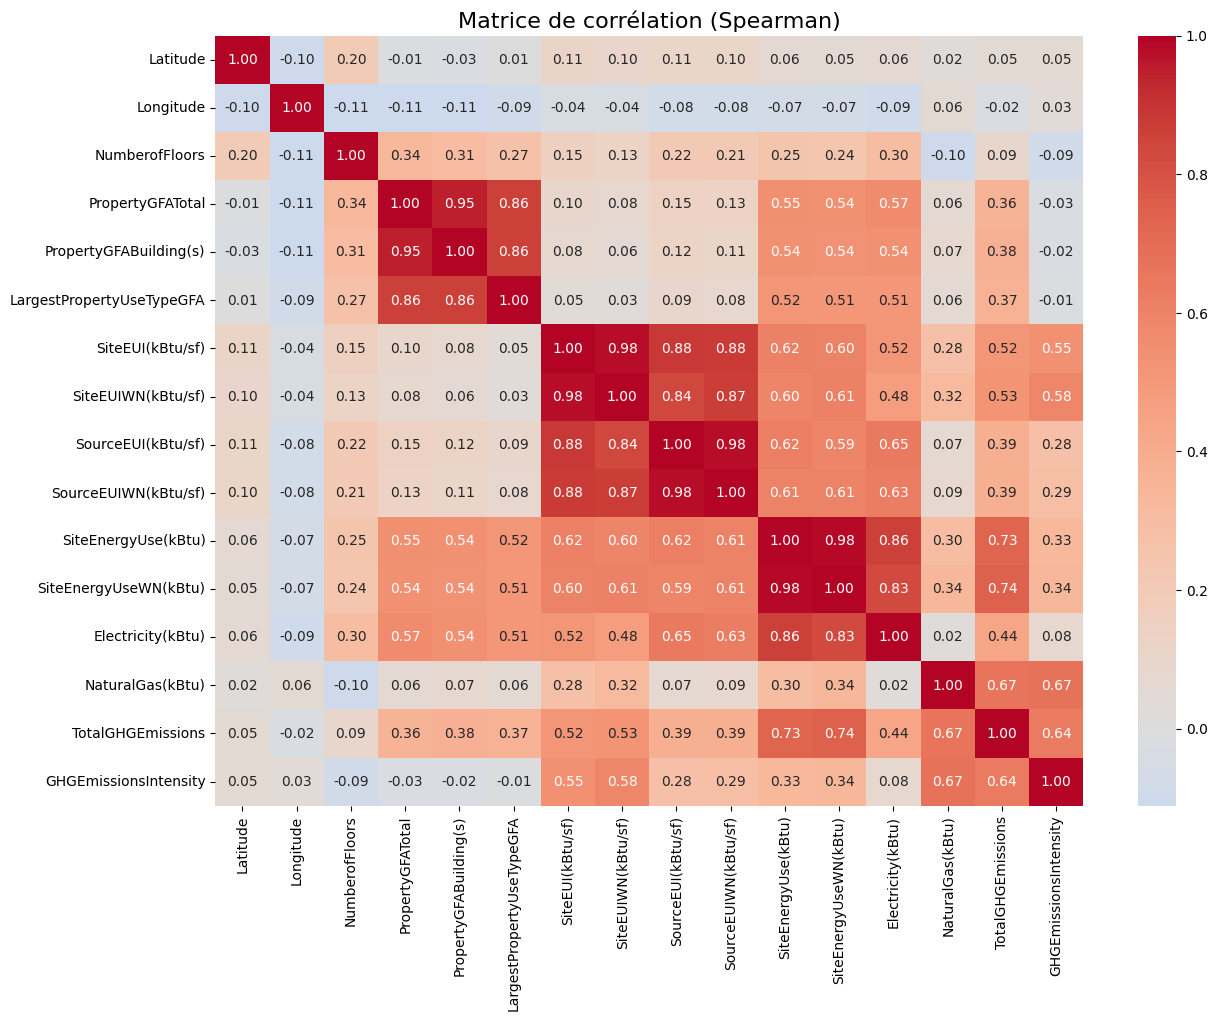

In [15]:
# Matrice de corrélation
corr_spearman = building_consumption[numeric_columns].corr(method="spearman")

#Afficher la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_spearman, #Matrice de corrélation
    annot=True, #Afficher les valeurs dans les cases
    fmt=".2f", #Formater à deux chiffres les décimales
    cmap="coolwarm", #Pour les couleurs rouge et bleu
    center=0,
    cbar=True #Affiche la barre de couleur
)
plt.title("Matrice de corrélation (Spearman)", fontsize=16)
plt.show()

*Nos variables cibles étant* **TotalGHGEmissions** et **SiteEnergyUse(kBtu)** *nous allons à présent à partir de la matrice de corrélation trouver les variables prédictrices numériques*
> La condition est de prendre toutes les variales en colonne exceptées les variables cibles et garder toutes celles qui ont une corrélation entre 0.6 et 1.

In [16]:
predict_varibales = utils.correlation_filter(corr_spearman, ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"], 0.6)

Les colonnes corrélées au seuil de 0.6 avec TotalGHGEmissions sont: ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'] 

Les colonnes corrélées au seuil de 0.6 avec SiteEnergyUse(kBtu) sont: ['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'TotalGHGEmissions'] 



In [17]:
display(building_consumption.head(5))

,OSEBuildingID,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1927,2,"88,434","88,434",Hotel,Hotel,"88,434",82,84,182,189,"7,226,362","7,456,910","3,946,027","1,276,453",Compliant,250,3
1,2,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1996,2,"103,566","88,502","Hotel, Parking, Restaurant",Hotel,"83,880",95,98,176,179,"8,387,933","8,664,479","3,242,851","483,518",Compliant,296,3
2,3,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1969,2,"49,250","47,226",Hotel,Hotel,"43,462",96,98,242,244,"2,498,541","2,642,232","1,597,427","1,493,800",Compliant,49,2
3,5,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1926,2,"61,320","61,320",Hotel,Hotel,"61,320",111,113,216,224,"6,794,584","6,946,800","2,768,924","1,811,213",Compliant,286,1
4,8,NonResidential,Hotel,"98,121",7,DOWNTOWN,48,-122,1980,2,"175,580","113,580","Hotel, Parking, Swimming Pool",Hotel,"123,445",115,119,211,216,"14,172,606","14,656,503","5,368,607","483,518",Compliant,49,3


**Trouver les variables prédictrices qualitatives via des boxplot**

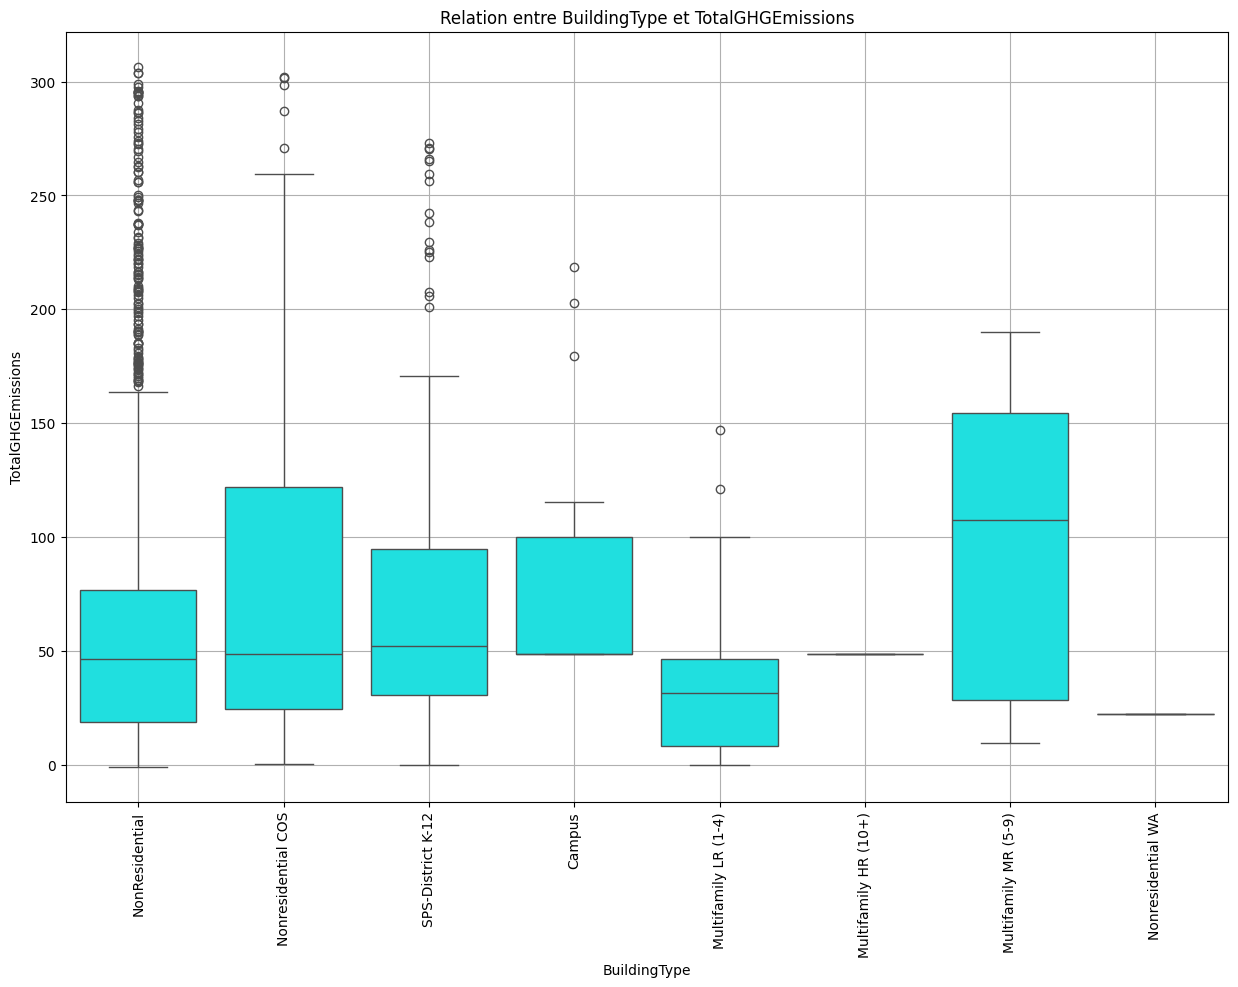

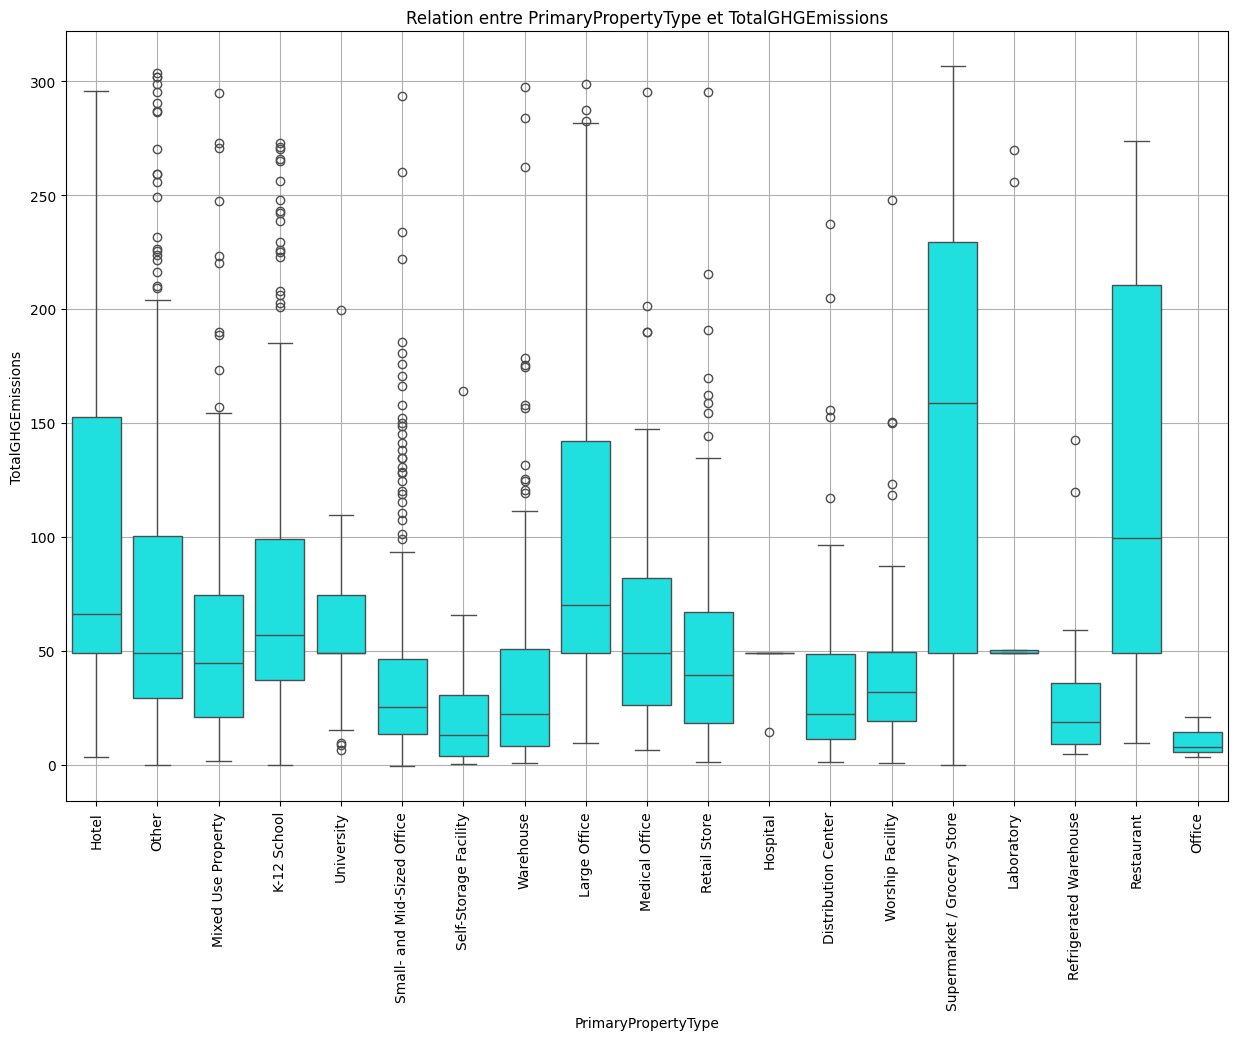

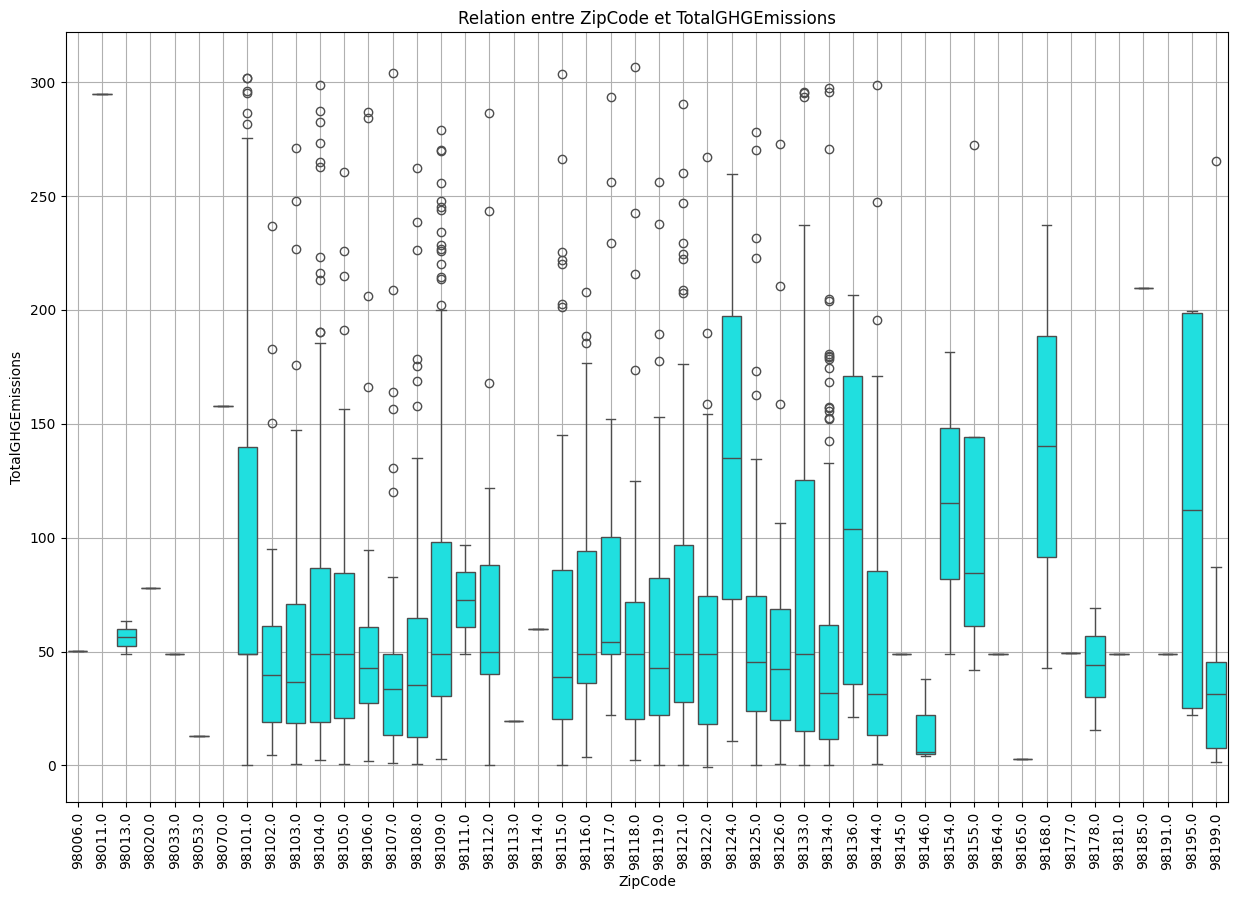

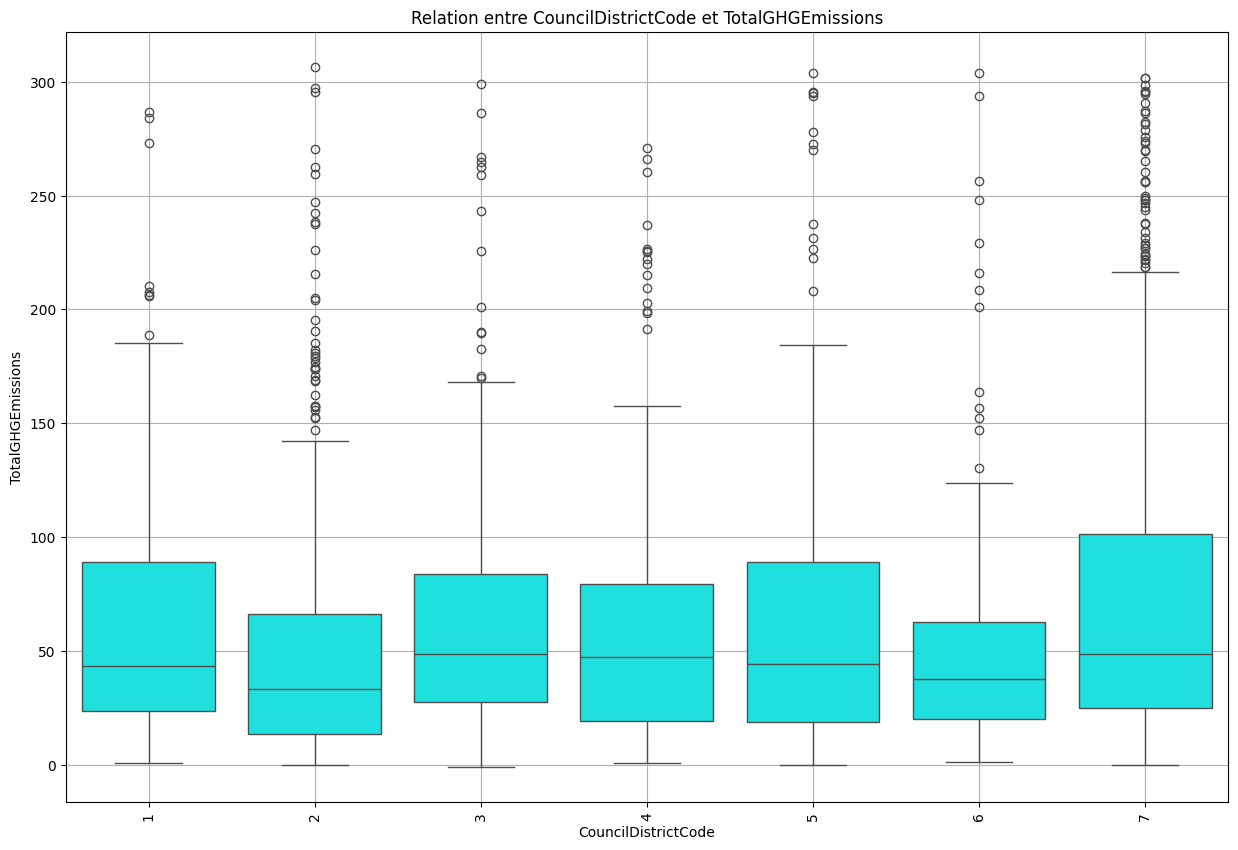

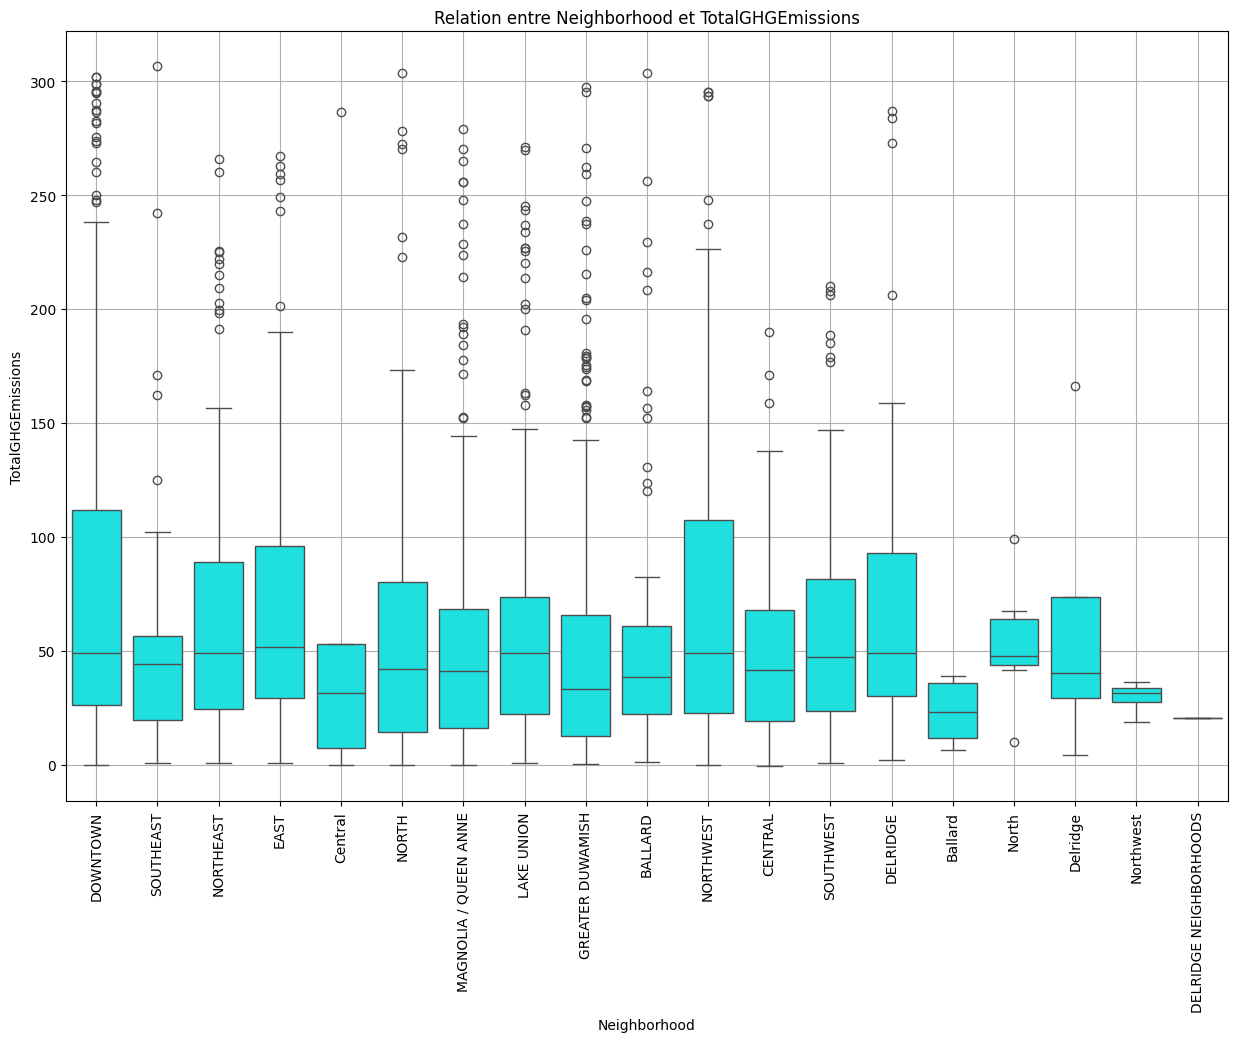

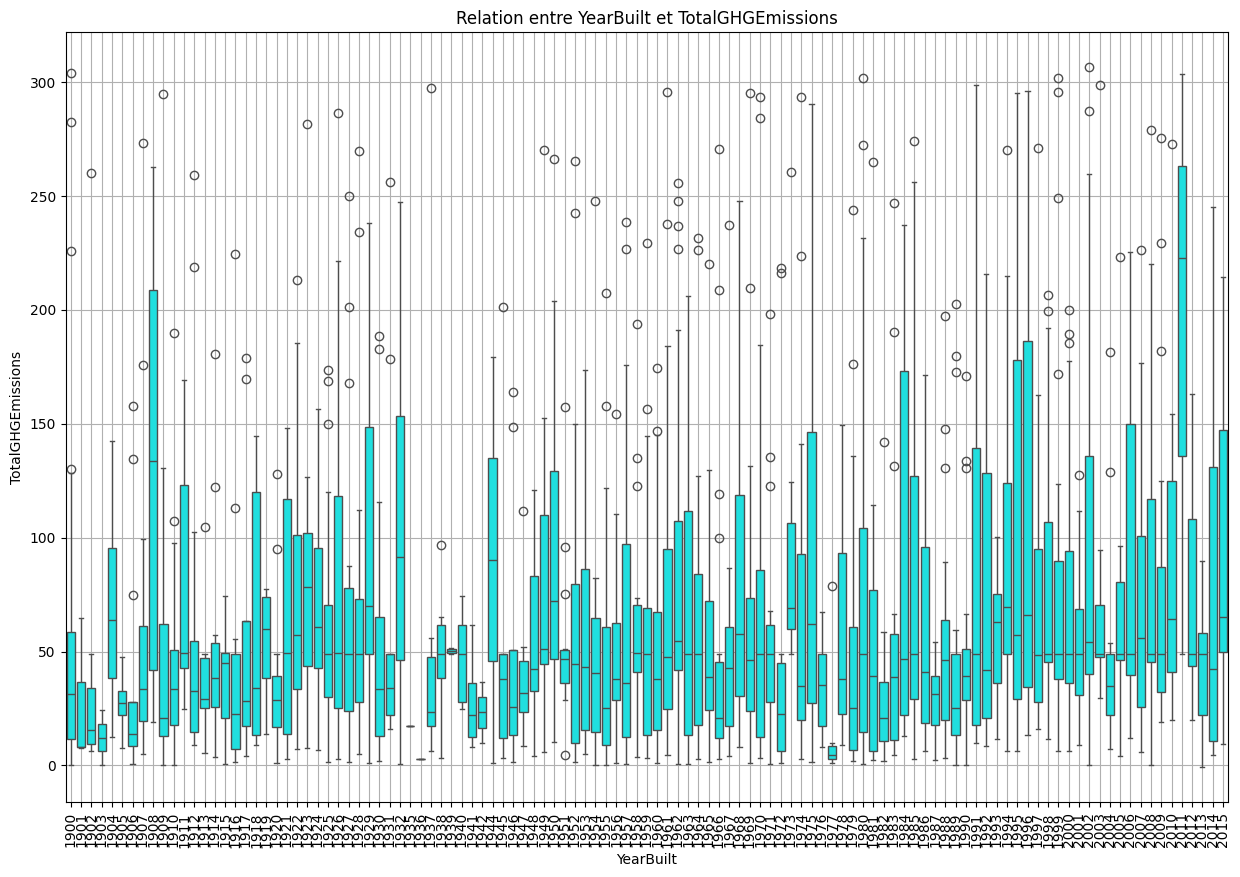

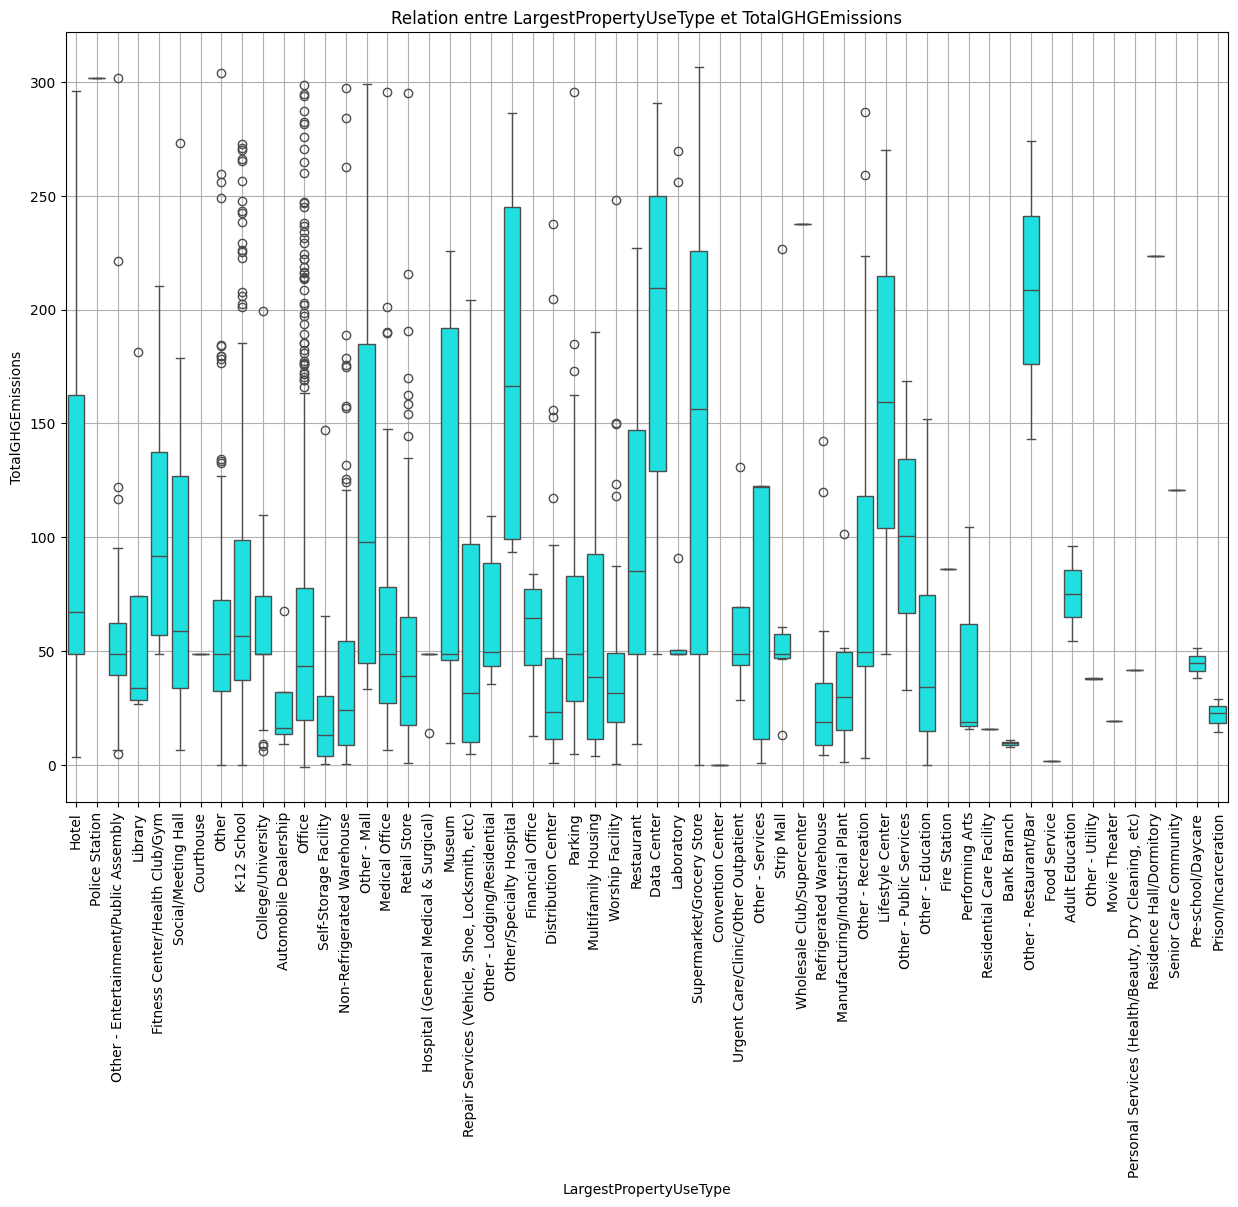

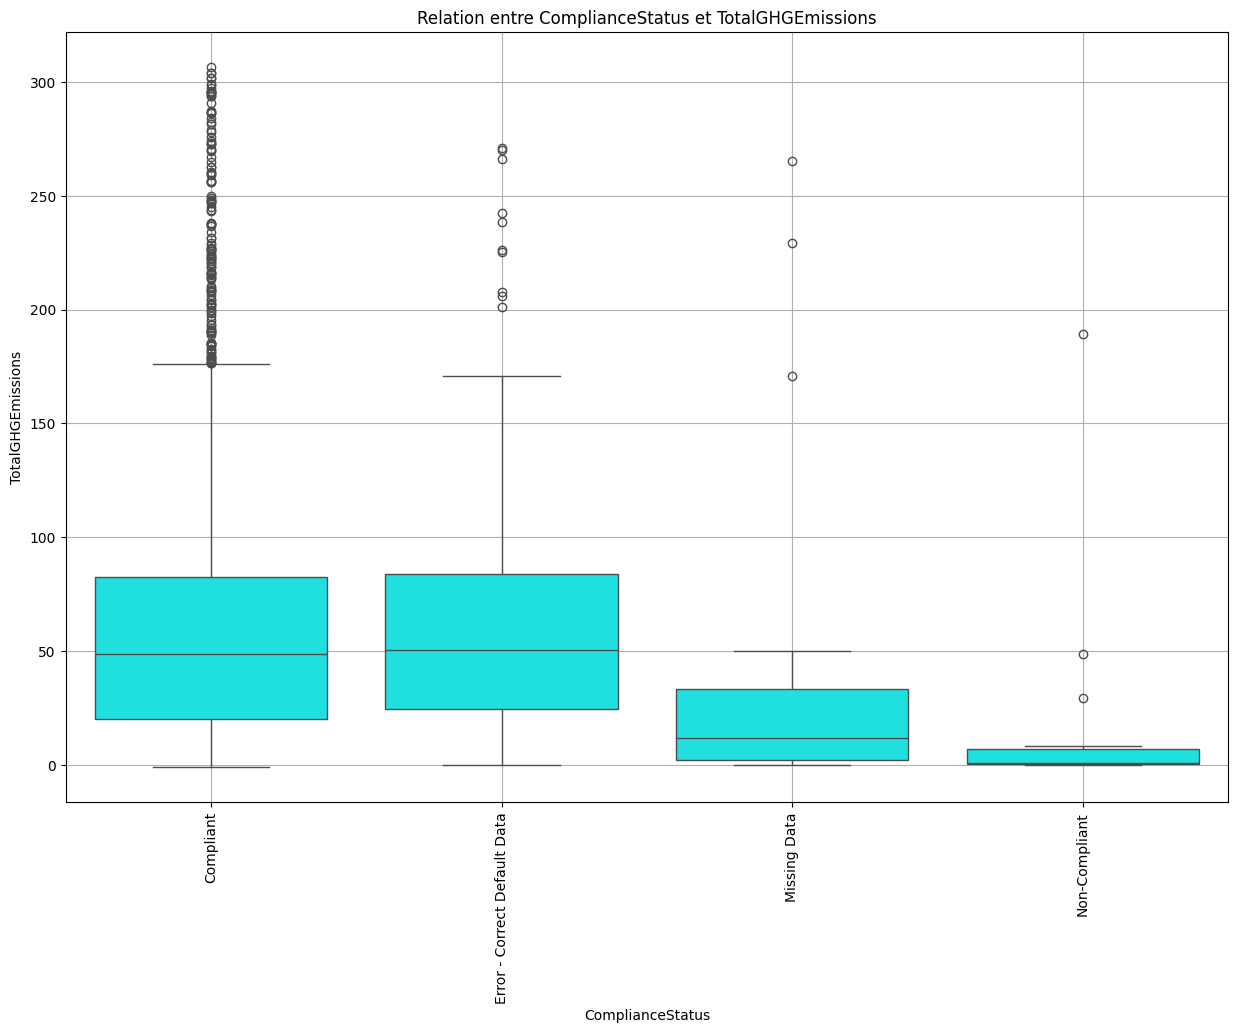

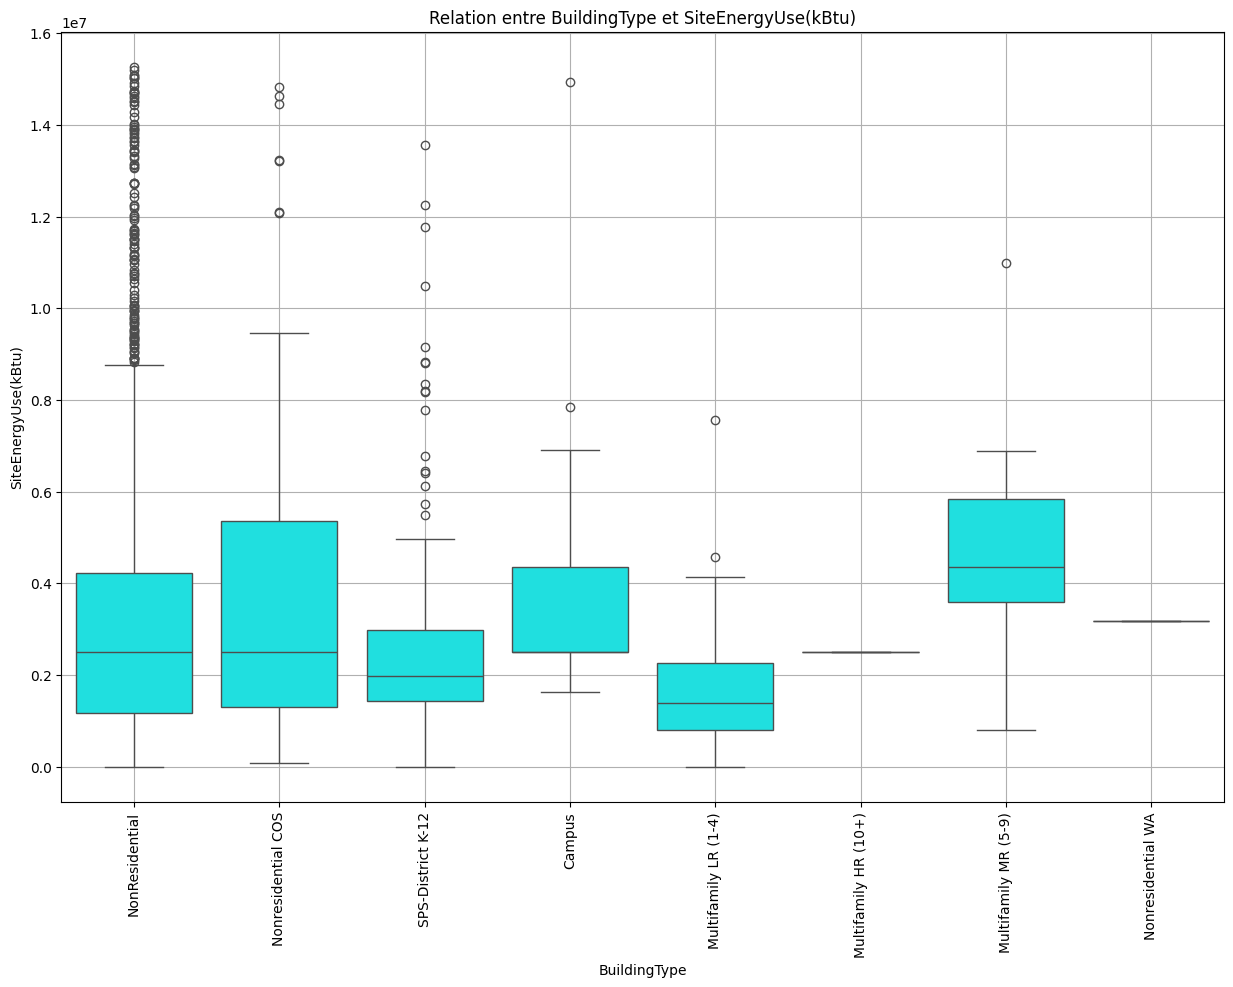

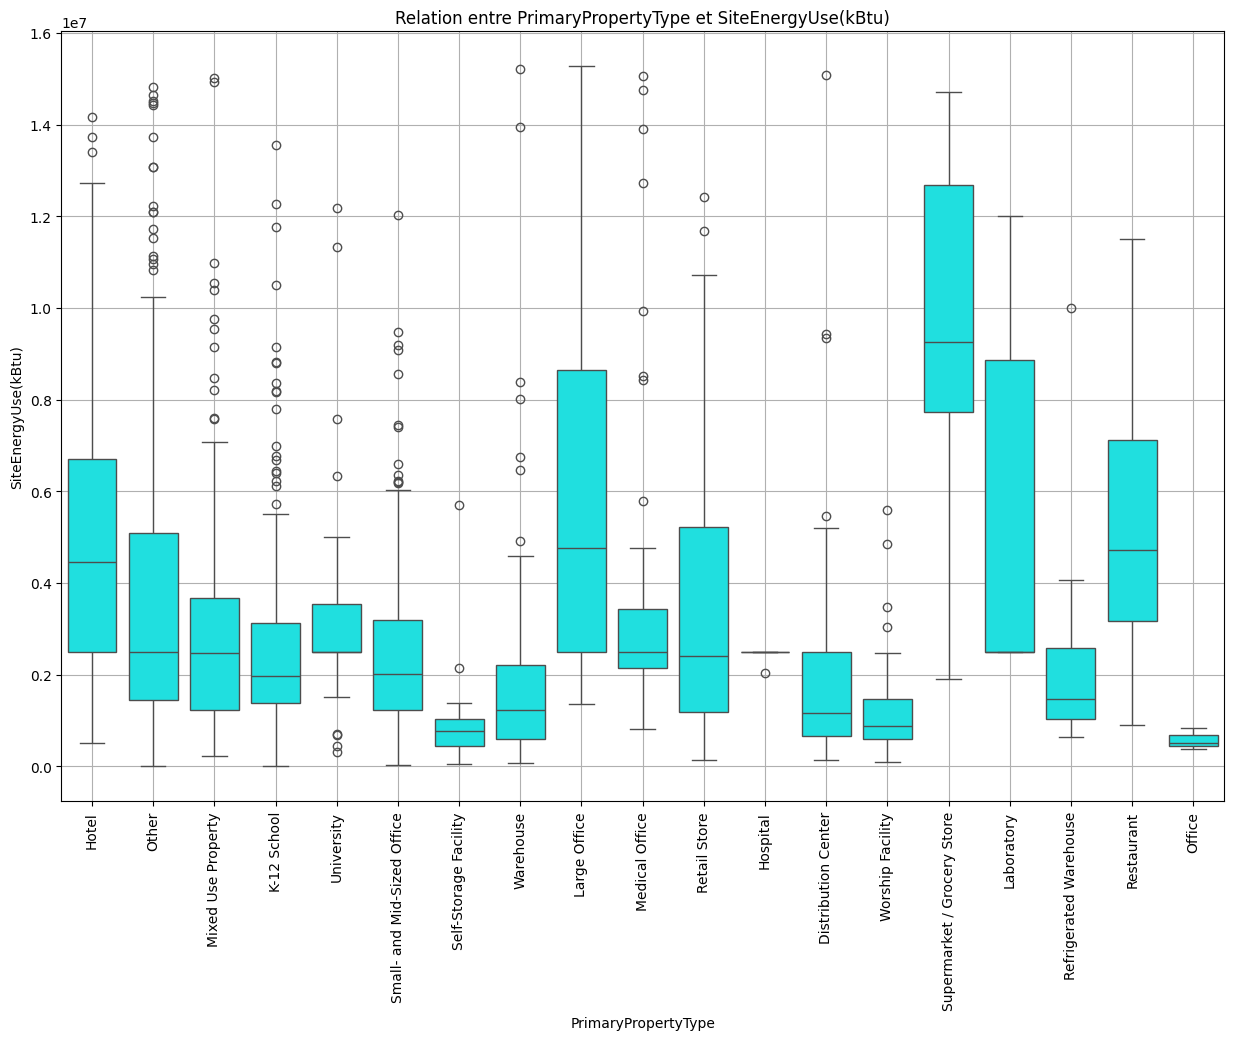

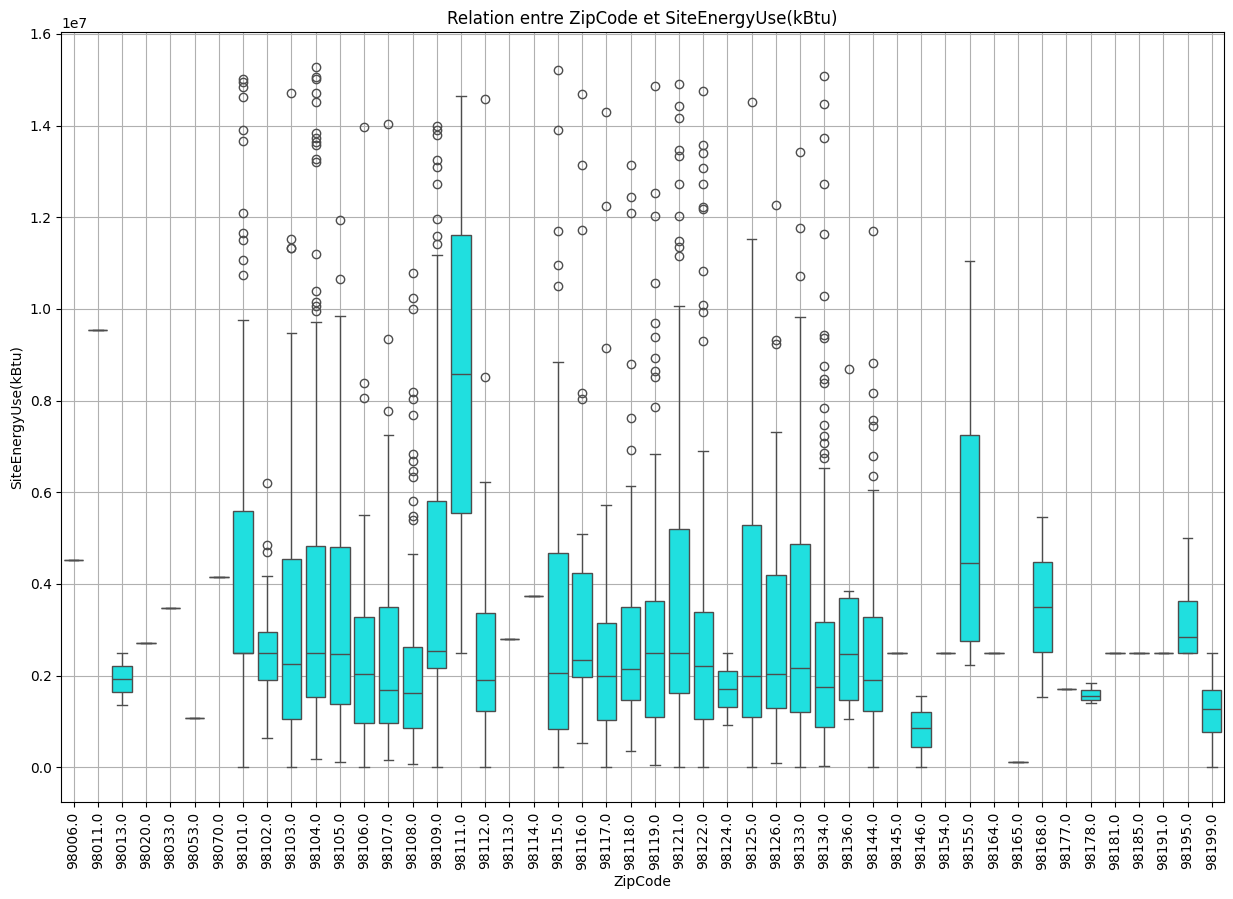

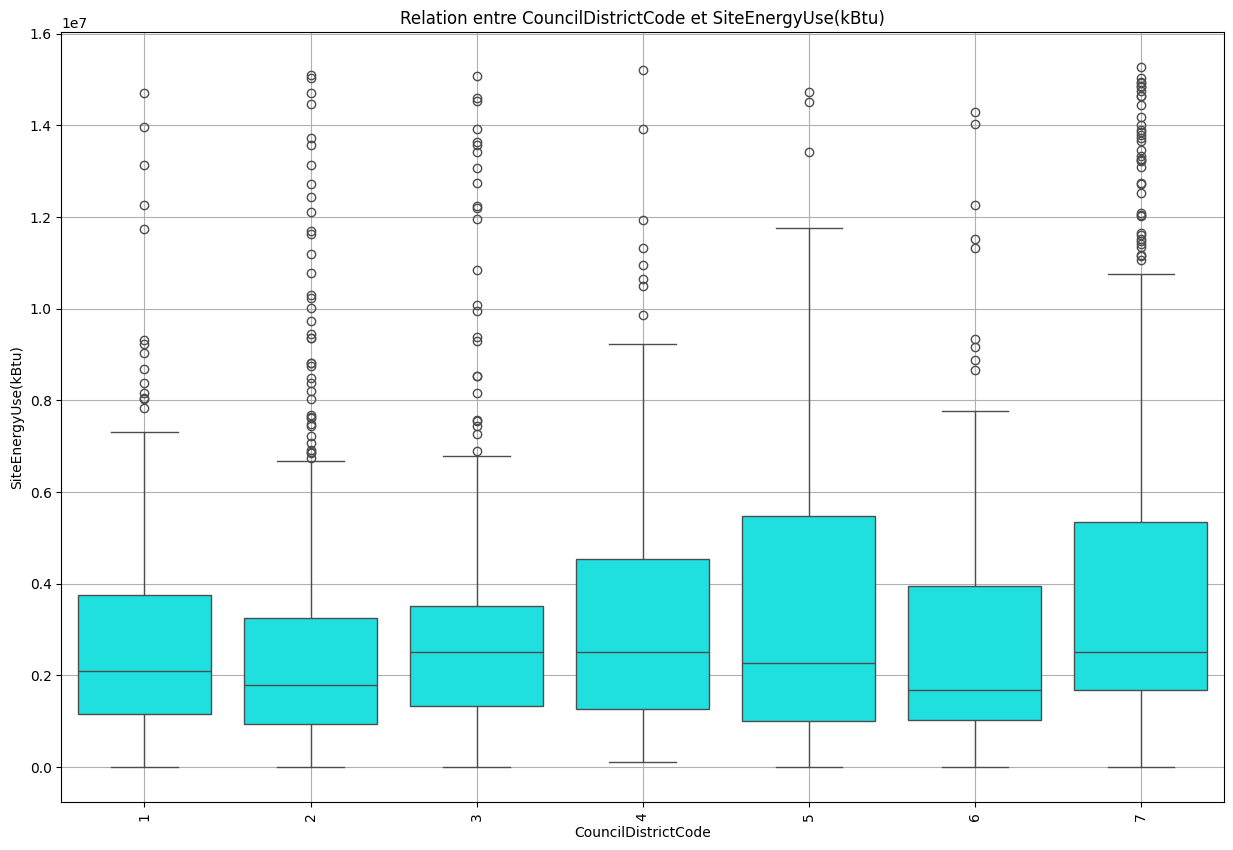

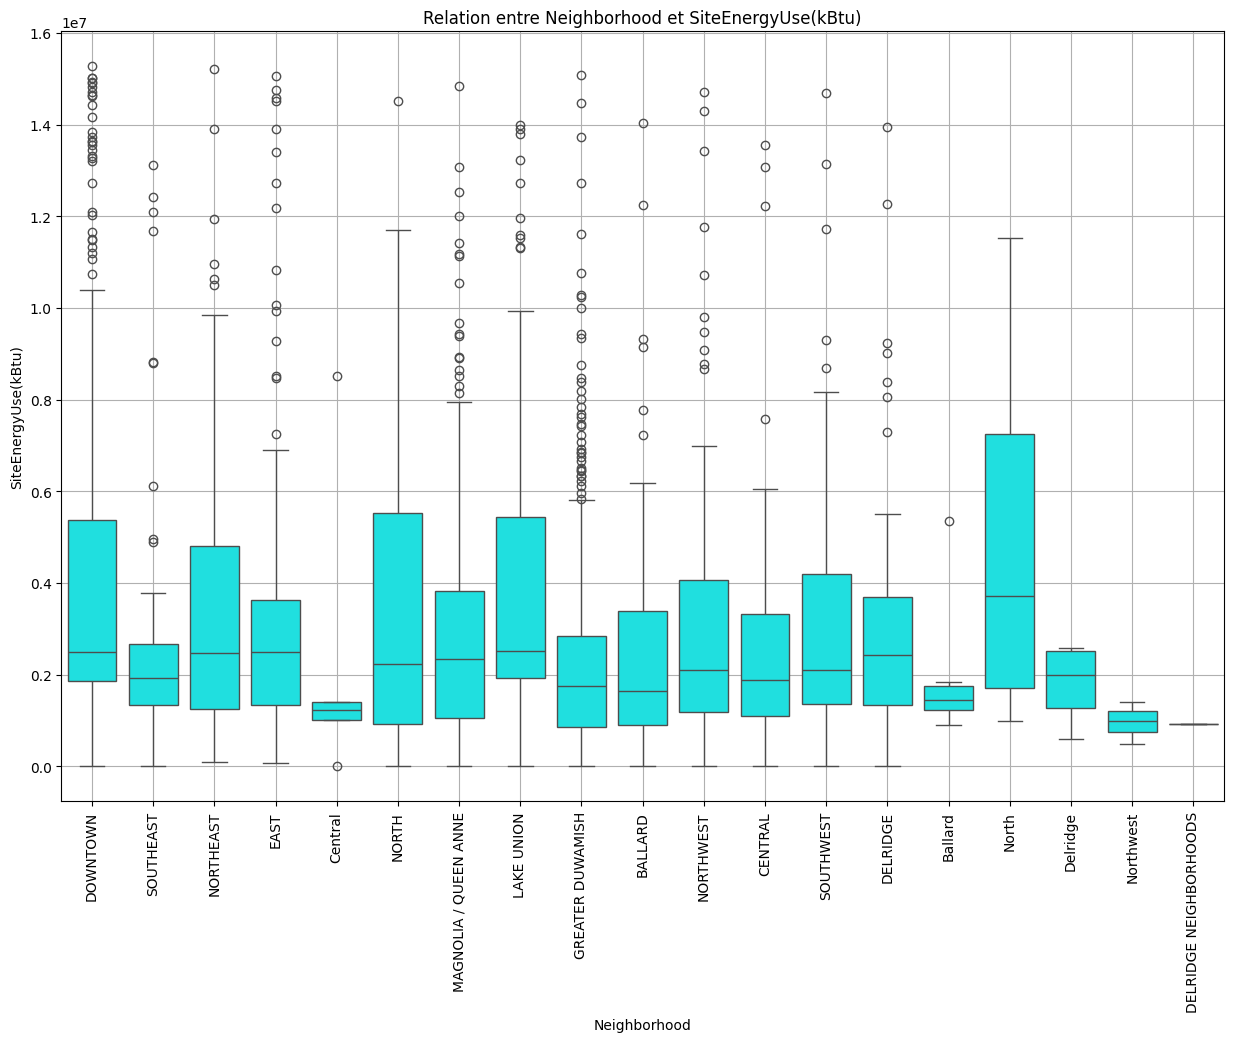

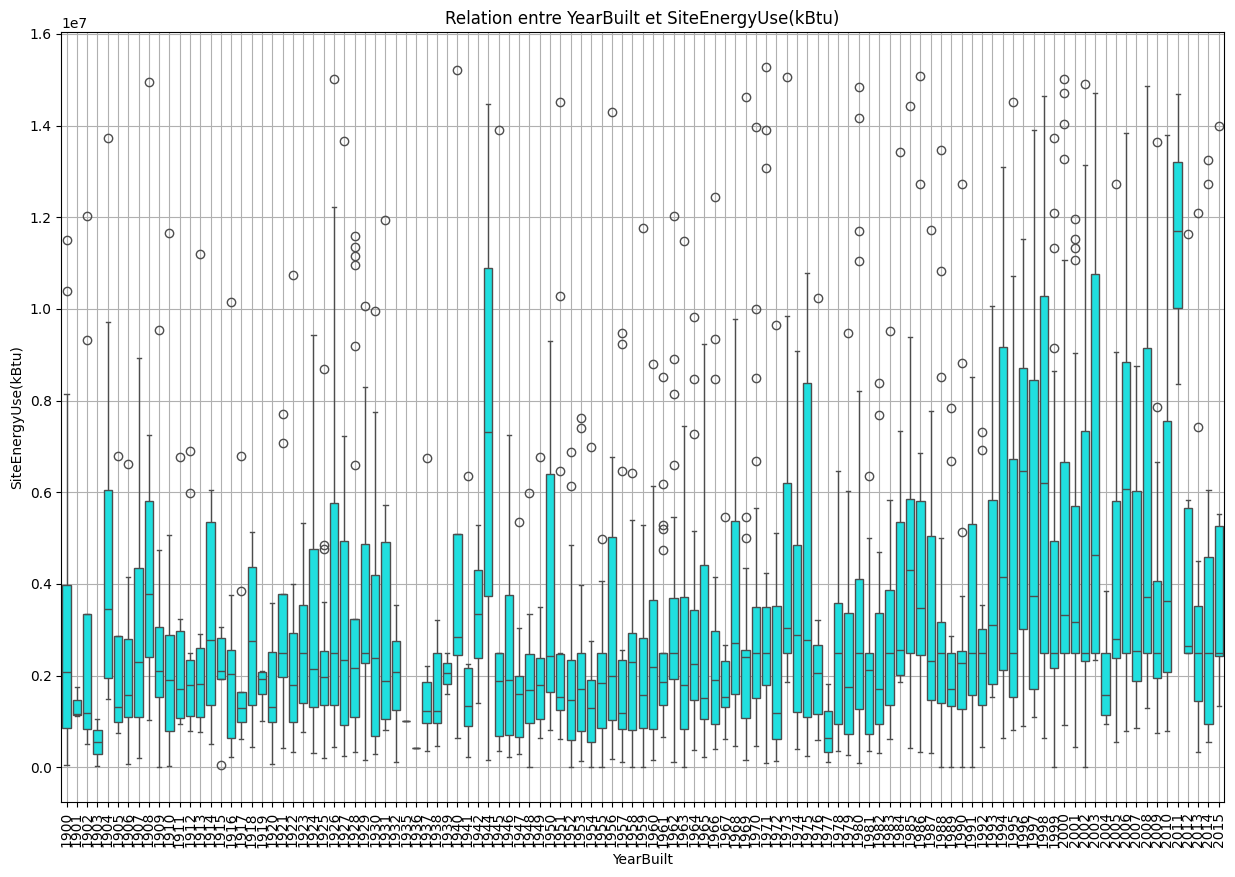

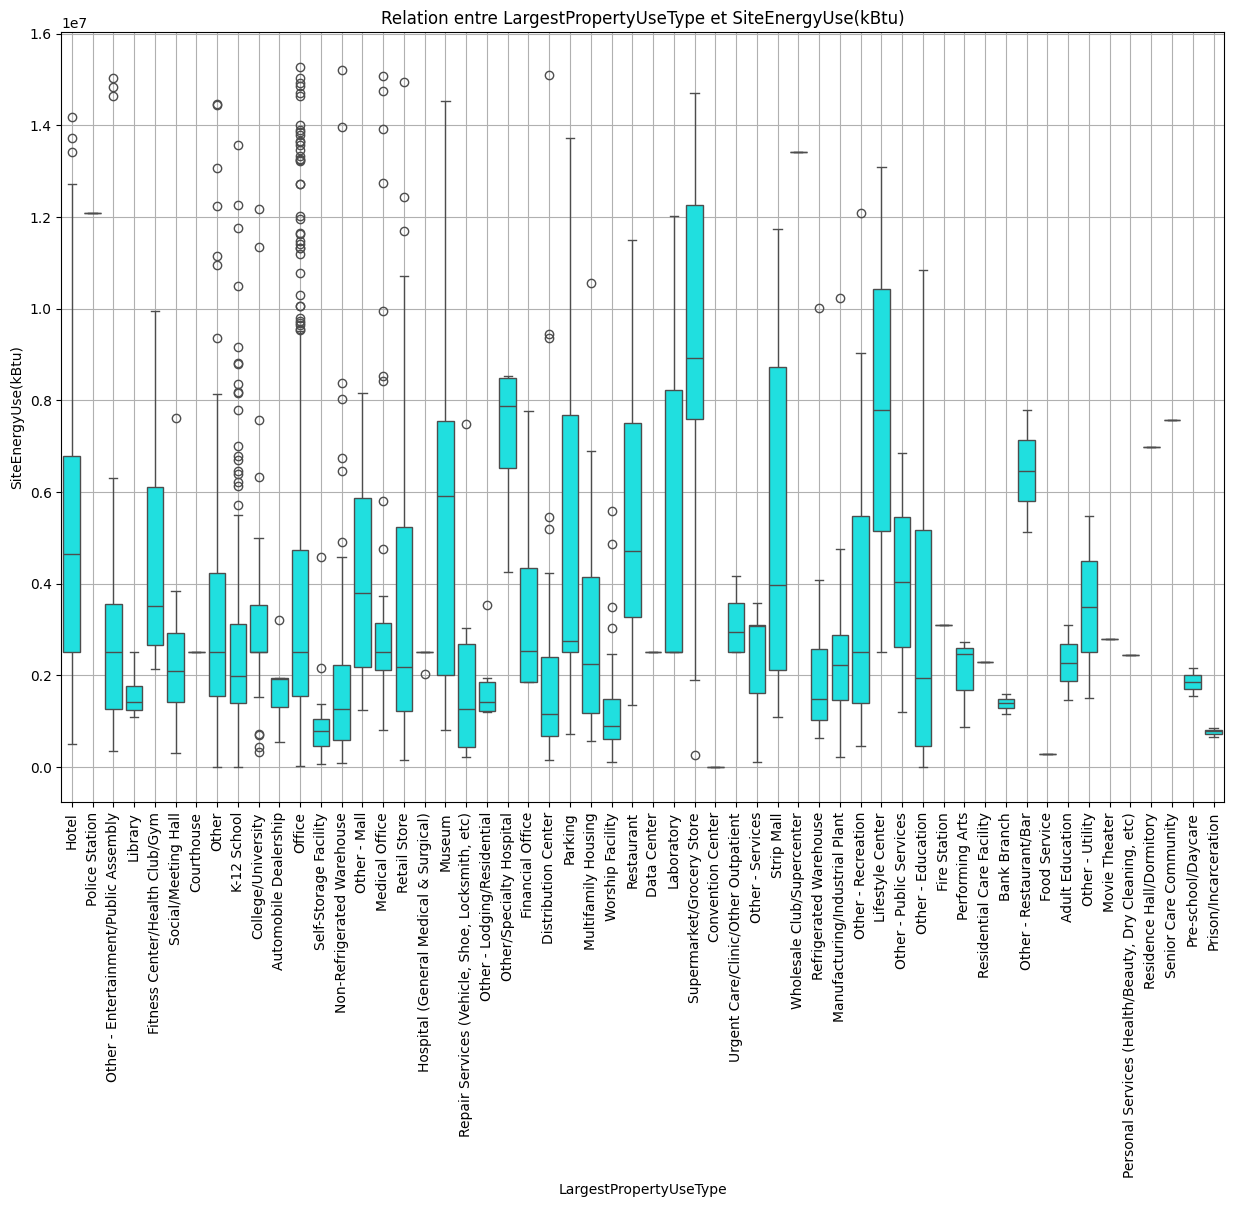

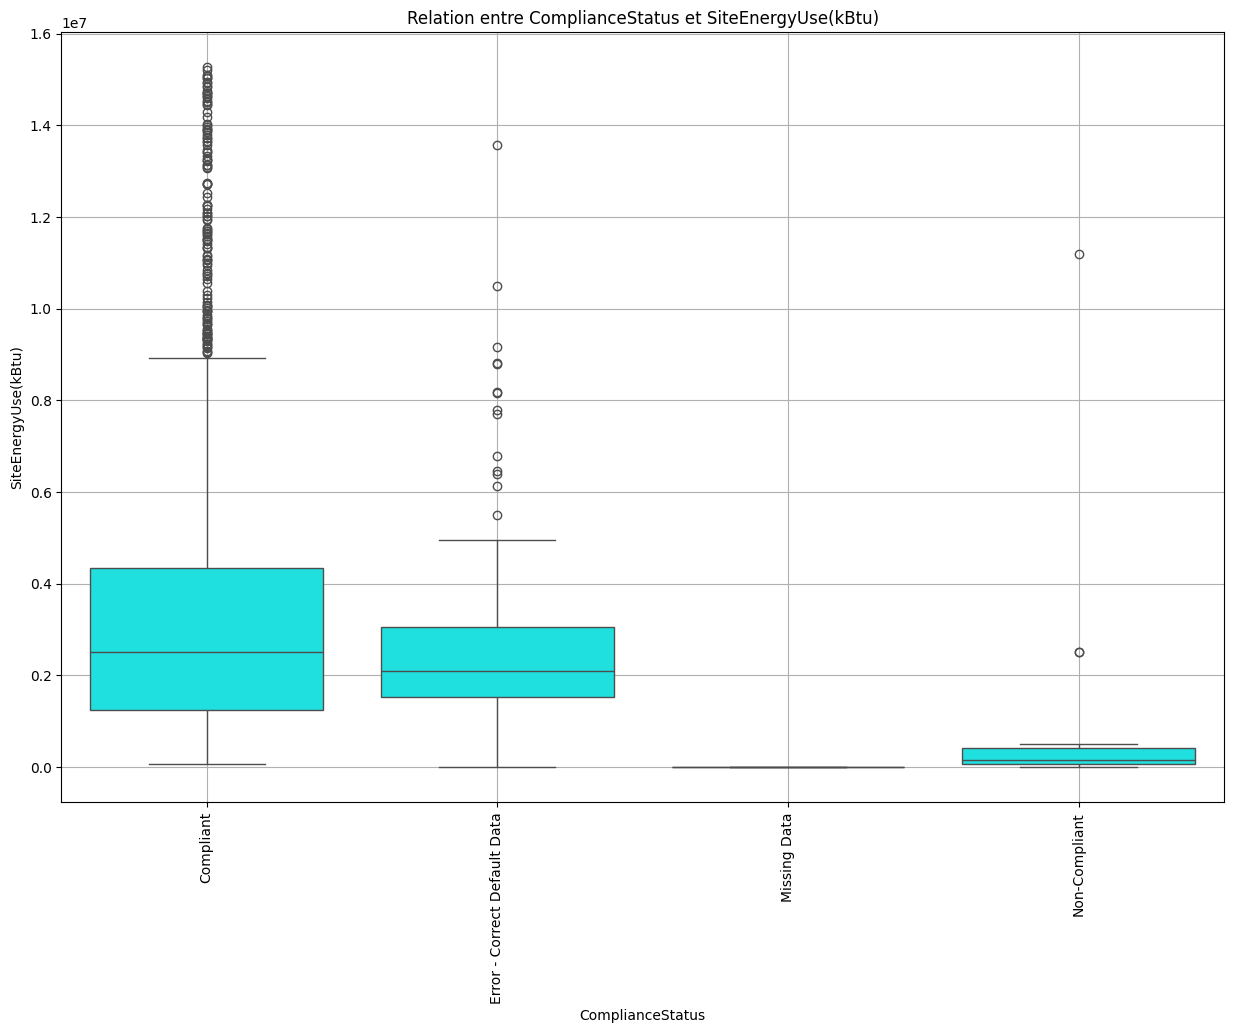

In [18]:
categorical_variables = [
    "BuildingType",
    "PrimaryPropertyType",
    "ZipCode",
    "CouncilDistrictCode",
    "Neighborhood",
    "YearBuilt",
    "LargestPropertyUseType",
    "ComplianceStatus"
]

targets = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]
colors = ["green", "red"]

for i, target in enumerate(targets):
    for column in categorical_variables:
        utils.make_plot(building_consumption, {
            "x": column,
            "y": target,
            "grid": True,
            "title": f"Relation entre {column} et {target}"
        }, "boxplot")

> Les médianes étant variables pour chaque catégories nous les conserverons toutes

# Modélisation 

### Import des modules 

In [19]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [20]:
# CODE FEATURE ENGINEERING
display(building_consumption)

,OSEBuildingID,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1927,2,"88,434","88,434",Hotel,Hotel,"88,434",82,84,182,189,"7,226,362","7,456,910","3,946,027","1,276,453",Compliant,250,3
1,2,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1996,2,"103,566","88,502","Hotel, Parking, Restaurant",Hotel,"83,880",95,98,176,179,"8,387,933","8,664,479","3,242,851","483,518",Compliant,296,3
2,3,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1969,2,"49,250","47,226",Hotel,Hotel,"43,462",96,98,242,244,"2,498,541","2,642,232","1,597,427","1,493,800",Compliant,49,2
3,5,NonResidential,Hotel,"98,101",7,DOWNTOWN,48,-122,1926,2,"61,320","61,320",Hotel,Hotel,"61,320",111,113,216,224,"6,794,584","6,946,800","2,768,924","1,811,213",Compliant,286,1
4,8,NonResidential,Hotel,"98,121",7,DOWNTOWN,48,-122,1980,2,"175,580","113,580","Hotel, Parking, Swimming Pool",Hotel,"123,445",115,119,211,216,"14,172,606","14,656,503","5,368,607","483,518",Compliant,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,NaN,2,GREATER DUWAMISH,48,-122,1990,1,"12,294","12,294",Office,Office,"12,294",69,77,162,176,"849,746","943,003","524,271","325,475",Error - Correct Default Data,21,2
3372,50223,Nonresidential COS,Other,NaN,2,DOWNTOWN,48,-122,2004,1,"16,000","16,000",Other - Recreation,Other - Recreation,"16,000",59,66,114,119,"950,276","1,053,706","396,546","553,730",Compliant,32,2
3373,50224,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,48,-122,1974,1,"13,157","13,157","Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,"7,583",51,54,129,133,"5,765,898","6,053,764","1,792,159","483,518",Compliant,224,1
3374,50225,Nonresidential COS,Mixed Use Property,NaN,1,GREATER DUWAMISH,48,-122,1989,1,"14,101","14,101","Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,"6,601",51,56,105,111,"719,471","782,841","348,870","370,601",Compliant,22,2


In [21]:
# Nouvelle feature 1: Age du bâtiment
current_year = 2025
building_consumption["BuildingAge"] = building_consumption["YearBuilt"].apply(lambda x: current_year - x)

# Nouvelle feature 2: Nombre de types d’usage par bâtiment
building_consumption["NumPropertyUseTypes"] = building_consumption["ListOfAllPropertyUseTypes"].apply(
    lambda x: len(str(x).split(","))
)

# Nouvelle feature 3: GFA par étage
building_consumption["GFAPerFloor"] = building_consumption["PropertyGFATotal"] / building_consumption["NumberofFloors"]

# Nouvelle feature 4 : consommation d’énergie normalisée par surface
building_consumption["EnergyUsePerArea"] = building_consumption["SiteEnergyUse(kBtu)"] / building_consumption["PropertyGFATotal"]

# Nouvelle feature 5 : émissions selon la surface
building_consumption["EmissionsPerArea"] = building_consumption["TotalGHGEmissions"] / building_consumption["PropertyGFATotal"]

# Nouvelle feature 6 : catégorisation du nombre d’étages
def categorize_floors(x):
    if x <= 3:
        return "LowRise"
    elif x <= 7:
        return "MidRise"
    else:
        return "HighRise"

building_consumption["FloorsCategory"] = building_consumption["NumberofFloors"].apply(categorize_floors)


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

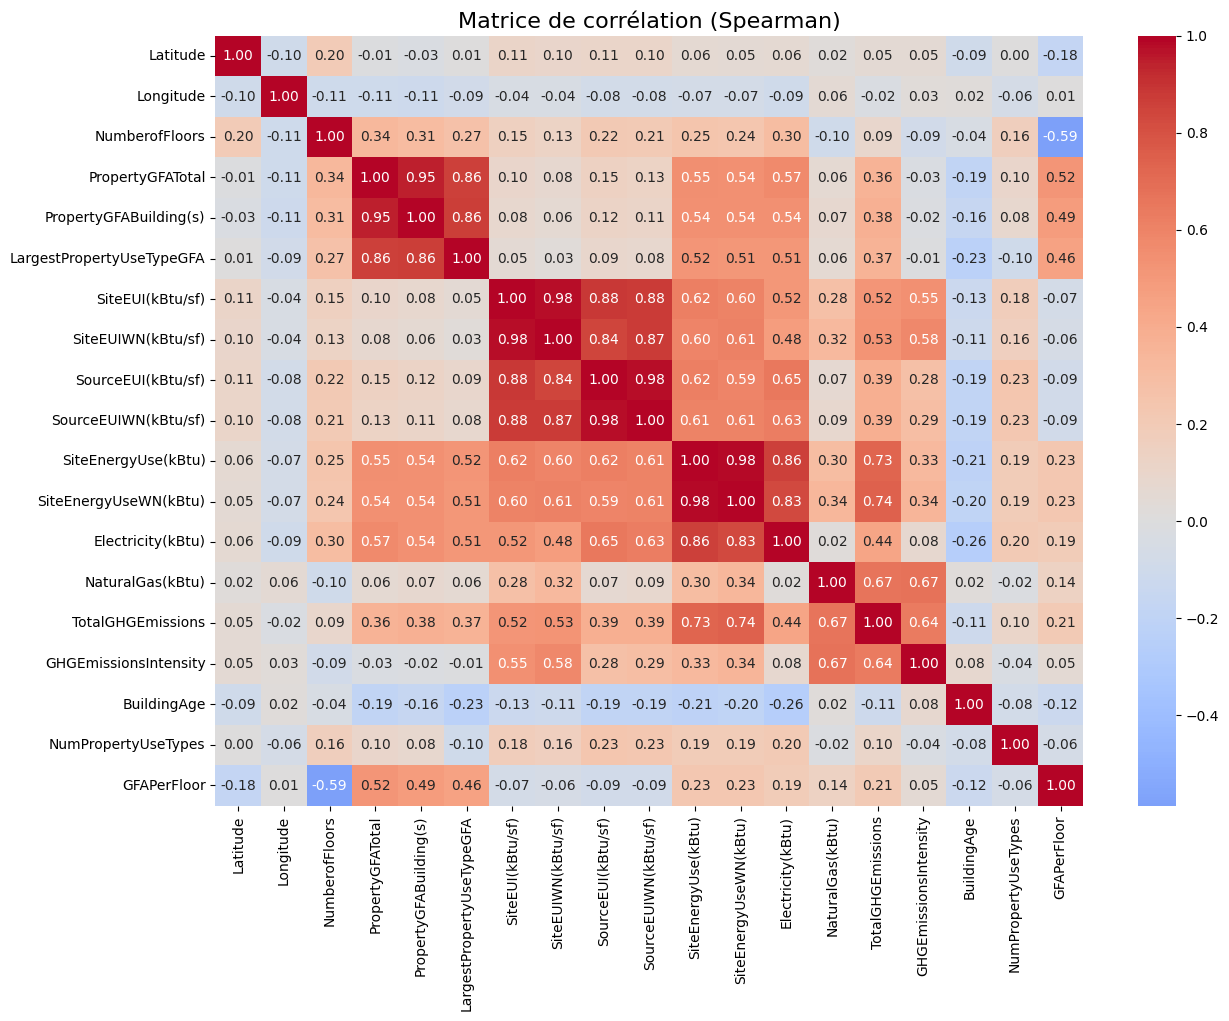

Les colonnes corrélées au seuil de 0.6 avec TotalGHGEmissions sont: ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'] 

Les colonnes corrélées au seuil de 0.6 avec SiteEnergyUse(kBtu) sont: ['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'TotalGHGEmissions'] 



{'TotalGHGEmissions': ['SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'NaturalGas(kBtu)',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'],
 'SiteEnergyUse(kBtu)': ['SiteEUI(kBtu/sf)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'Electricity(kBtu)',
  'TotalGHGEmissions']}

In [22]:
# CODE PREPARATION DES FEATURES
# Matrice de corrélation
numeric_columns.extend([
    "BuildingAge",
    "NumPropertyUseTypes",
    "GFAPerFloor"
])
corr_spearman = building_consumption[numeric_columns].corr(method="spearman")

#Afficher la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_spearman, #Matrice de corrélation
    annot=True, #Afficher les valeurs dans les cases
    fmt=".2f", #Formater à deux chiffres les décimales
    cmap="coolwarm", #Pour les couleurs rouge et bleu
    center=0,
    cbar=True #Affiche la barre de couleur
)
plt.title("Matrice de corrélation (Spearman)", fontsize=16)
plt.show()

predict_variables = utils.correlation_filter(corr_spearman, ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"], 0.6)
display(predict_variables)

### Scaling des variables numériques

In [23]:
### Mettre les variables numeriques à la même échelle
scaler = StandardScaler()
#SiteEnergyUse
energy_X_variables = list(predict_variables["SiteEnergyUse(kBtu)"])
energy_X_variables.extend(categorical_variables)

#TotalGHGEmissions
emissions_X_variables = list(predict_variables["TotalGHGEmissions"])
emissions_X_variables.extend(categorical_variables)

building_consumption_energy = building_consumption[energy_X_variables]
building_consumption_emissions = building_consumption[emissions_X_variables]


#Scaler que sur les colonnes numérique
scaler = StandardScaler()
building_consumption_energy.loc[:, predict_varibales["SiteEnergyUse(kBtu)"]] = scaler.fit_transform(
    building_consumption[predict_varibales["SiteEnergyUse(kBtu)"]]
)
building_consumption_emissions.loc[:, predict_varibales["TotalGHGEmissions"]] = scaler.fit_transform(
    building_consumption[predict_varibales["TotalGHGEmissions"]]
)



Encodage des variables catégorielles

In [24]:
#remplacer les lignes vides par "missing"
for column in categorical_variables:
    building_consumption[column] = building_consumption[column].fillna("Missing").astype(str)

#initialisation
ohe = OneHotEncoder(sparse_output=False, drop='first')

#Appliquer sur le dataset
encoded_features = ohe.fit_transform(building_consumption[categorical_variables])

#Transformer en Dataframe avec les bons noms de colonnes
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_variables), index=building_consumption.index)


# Concaténer les colonnes encodées à energy et emissions
building_consumption_energy = pd.concat([building_consumption_energy, encoded_df], axis=1)
building_consumption_emissions = pd.concat([building_consumption_emissions, encoded_df], axis=1)

# Supprimer les colonnes catégorielles originales de energy et emissions
building_consumption_energy.drop(columns=categorical_variables, inplace=True)
building_consumption_emissions.drop(columns=categorical_variables, inplace=True)

### Prédiction EnergyUse

In [25]:

# Séparer features (X) et target (y)
building_consumption_energy = building_consumption_energy.dropna()
X_energy = building_consumption_energy.drop(columns=["SiteEnergyUse(kBtu)"])
y_energy = building_consumption_energy["SiteEnergyUse(kBtu)"]

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model_energy = LinearRegression()
model_energy.fit(X_train, y_train)

# Prédiction
y_pred_test = model_energy.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE = {mse:.2f}")
print(f"R² = {r2:.2f}")

MSE = 0.05
R² = 0.94


In [26]:
# Séparer features (X) et target (y)
building_consumption_emissions = building_consumption_emissions.dropna()
X_emissions = building_consumption_emissions.drop(columns=["TotalGHGEmissions"])
y_emissions = building_consumption_emissions["TotalGHGEmissions"]

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X_emissions, y_emissions, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model_emissions = LinearRegression()
model_emissions.fit(X_train, y_train)

# Prédiction
y_pred_test = model_emissions.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE = {mse:.2f}")
print(f"R² = {r2:.2f}")

MSE = 0.68
R² = 0.22


### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [27]:
# CODE COMPARAISON DES MODELES

#Modèle à base d'arbres avec TotalGHEmissions
# Séparer features et target
building_consumption_emissions = building_consumption_emissions.dropna()
X_emissions = building_consumption_emissions.drop(columns=["TotalGHGEmissions"])
y_emissions = building_consumption_emissions["TotalGHGEmissions"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_emissions, y_emissions, test_size=0.2, random_state=42
)

#Modèle RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Prediction
y_pred_test = rf_model.predict(X_test)

#Métrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE = {mse:.2f}")
print(f"R² = {r2:.2f}")

MSE = 0.26
R² = 0.70


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE